# Imaging weights

In this notebook we will make a plot of the coefficients of a logistic regression when trained to classify 0 and 1 from the MNIST dataset.

In [1]:
!wget https://storage.googleapis.com/machine-learning-course-datasets/mnist_mnist_train_sample.csv -O /tmp/train.csv

--2019-08-30 06:56:20--  https://storage.googleapis.com/machine-learning-course-datasets/mnist_mnist_train_sample.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1827725 (1.7M) [application/octet-stream]
Saving to: ‘/tmp/train.csv’

/tmp/train.csv      100%[===================>]   1.74M  --.-KB/s    in 0.008s  

2019-08-30 06:56:21 (208 MB/s) - ‘/tmp/train.csv’ saved [1827725/1827725]



In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data=pd.read_csv("/tmp/train.csv")
data=data[data["label"]<2] # Include only 0 and 1 in the dataset

In [0]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0, solver="lbfgs").fit(data[data.columns[1:]], data["label"])

Once the logistic regression has been trained, the coefficients can be found in the **coef_** property. We find the highest and the lowest coefficent, so we can scale to something plottable.

In [0]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler().fit(classifier.coef_)

mincoef=classifier.coef_.min()
maxcoef=classifier.coef_.max()

If we scale the coefficents to values between 0 and 255 we can plot them as a gray scale image.

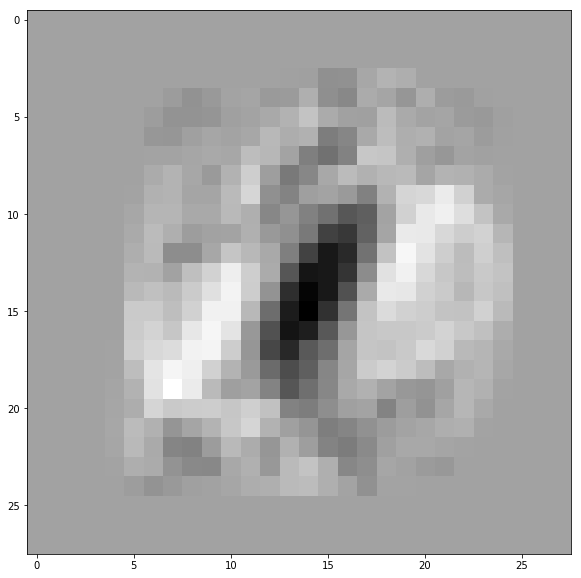

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

image=((classifier.coef_-mincoef)/(maxcoef-mincoef)*255).reshape((28,28))
plt.imshow(image, cmap='gray_r') 
   